Running Julia benchmark (N=2 to 14)
N=2: 0.0 s
N=3: 0.082 s
N=4: 0.021 s
N=5: 0.019 s
N=6: 0.02 s
N=7: 0.039 s
N=8: 0.114 s
N=9: 0.26 s
N=10: 0.879 s
N=11: 3.188 s
N=12: 9.504 s
N=13: 29.661 s
N=14: 85.769 s
[0.0, 0.082, 0.021, 0.019, 0.02, 0.039, 0.114, 0.26, 0.879, 3.188, 9.504, 29.661, 85.769]


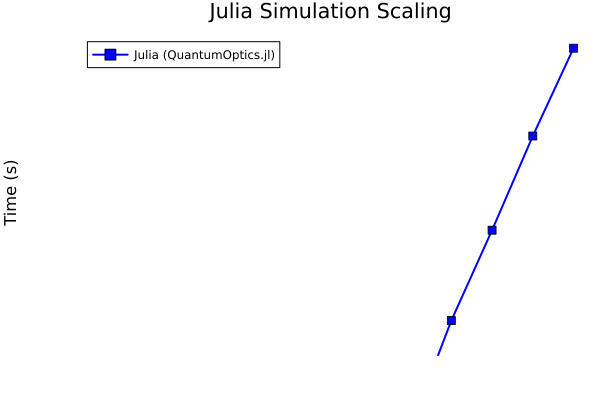

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Vedant\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Vedant\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Vedant\.julia\packages\Plots\pxXHF\src\utils.jl:105
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Vedant\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Vedant\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Vedant\.julia\packages\Plots\pxXHF\src\utils.jl:105
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Vedant\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Vedant\.julia\packages\PlotUtils\HX80C\src\ticks.jl:194


In [2]:
using QuantumOptics
using Dates
using Plots

function build_system(N, wc, J, cutoff)
    b = FockBasis(cutoff - 1) 
    b_sys = tensor([b for i in 1:N]...)

    a = destroy(b)
    at = create(b)
    n = number(b)

    H = SparseOperator(b_sys)

    for i in 1:N
        H += wc * embed(b_sys, i, n)
    end

    for i in 1:N-1
        at_i = embed(b_sys, i, at)
        a_i  = embed(b_sys, i, a)
        at_j = embed(b_sys, i+1, at)
        a_j  = embed(b_sys, i+1, a)
        
        H += -J * (at_i * a_j + at_j * a_i)
    end

    return H, b_sys
end

function main()
    # Params
    wc = 1.0
    J = 0.1
    cutoff = 3
    tlist = [0:0.5:50;]
    
    cavities = 2:14
    julia_times = Float64[]

    println("Running Julia benchmark (N=2 to 14)")
    
    for N in cavities
        GC.gc() 
        t_start = now()

        H, b = build_system(N, wc, J, cutoff)

        psi_list = [fockstate(FockBasis(cutoff-1), 0) for i in 1:N]
        psi_list[1] = fockstate(FockBasis(cutoff-1), 1)
        psi0 = tensor(psi_list...)

        timeevolution.schroedinger(tlist, psi0, H)

        dt = (now() - t_start).value / 1000.0
        push!(julia_times, dt)
        println("N=$N: $dt s")
    end

    println(julia_times)


    # Display plot
    p = plot(cavities, julia_times, 
         label="Julia (QuantumOptics.jl)", 
         marker=:square, 
         color=:blue, 
         linewidth=2,
         yscale=:log10,
         title="Julia Simulation Scaling", 
         xlabel="Number of Cavities (N)", 
         ylabel="Time (s)", 
         legend=:topleft)

    display(p)
end

main()